In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [7]:
df = pd.read_csv('..\\Data\Raw\challenge_edMachina.csv', sep=';')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Lenovo G40 80\AppData\Local\Temp\ipykernel_8524\2930201563.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv('..\\Data\Raw\challenge_edMachina.csv', sep=';')


In [8]:
#revisión de las primeras filas
print(df.head())

   particion periodo  nota_final_materia  fecha_mesa_epoch nombre_examen  \
0          0  1-2022                 9.0               NaN           NaN   
1          1  1-2022                 9.0               NaN           NaN   
2          2  1-2022                 9.0               NaN           NaN   
3          3  1-2022                 9.0               NaN           NaN   
4          4  1-2022                 9.0               NaN           NaN   

   nota_parcial  assignment_id ass_name  ass_created_at  ass_due_at  ...  \
0           NaN            NaN      NaN             NaN         NaN  ...   
1           NaN            NaN      NaN             NaN         NaN  ...   
2           NaN            NaN      NaN             NaN         NaN  ...   
3           NaN            NaN      NaN             NaN         NaN  ...   
4           NaN            NaN      NaN             NaN         NaN  ...   

   sub_uuid  score  submission_type s_submitted_at s_graded_at  s_created_at  \
0     

In [9]:
#verificación de tipo de datos y los datos faltantes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   particion           196124 non-null  int64  
 1   periodo             196124 non-null  object 
 2   nota_final_materia  196124 non-null  float64
 3   fecha_mesa_epoch    7010 non-null    float64
 4   nombre_examen       7010 non-null    object 
 5   nota_parcial        7010 non-null    float64
 6   assignment_id       26061 non-null   float64
 7   ass_name            26061 non-null   object 
 8   ass_created_at      26061 non-null   float64
 9   ass_due_at          26061 non-null   float64
 10  ass_unlock_at       24760 non-null   float64
 11  ass_lock_at         25979 non-null   float64
 12  points_possible     26061 non-null   float64
 13  ass_name_sub        24206 non-null   object 
 14  sub_uuid            24206 non-null   object 
 15  score               23876 non-null

particion                  0
periodo                    0
nota_final_materia         0
fecha_mesa_epoch      189114
nombre_examen         189114
nota_parcial          189114
assignment_id         170063
ass_name              170063
ass_created_at        170063
ass_due_at            170063
ass_unlock_at         171364
ass_lock_at           170145
points_possible       170063
ass_name_sub          171918
sub_uuid              171918
score                 172248
submission_type       171918
s_submitted_at        171918
s_graded_at           172247
s_created_at          171918
user_uuid                  0
course_uuid                0
course_name                0
legajo                     0
dtype: int64

Puedo ver que el dataset tiene un gran número de valores nulos en varias columnas. 
También puedo ver que 'nota_final_materia', 'user_uuid', 'course_uuid', 'particion', 'periodo', 'nota_final_materia' y 'score' son fundamentales para el anáisis y tienen 0 datos faltantes.


# Limpieza de datos

**Razón para eliminar columnas:**
Decidí eliminar las columnas 'fecha_mesa_epoch', 'ass_name_sub', 'sub_uuid', 'submission_type','s_submitted_at', 's_graded_at', 's_created_at' ya que contienen muchos valores nulos que no aportan información útil para el análisis ni para el modelado. 

La alta cantidad de datos faltantes en estas columnas podría hacer que el análisis sea menos preciso y complicado. Al eliminarlas, se mantienen los datos más limpios y relevantes, lo que facilita el proceso y mejora la calidad del modelo.

In [10]:
columns_to_drop = ['fecha_mesa_epoch', 'ass_name_sub', 'sub_uuid', 'submission_type',
                    's_submitted_at', 's_graded_at', 's_created_at']
df = df.drop(columns=columns_to_drop)

In [11]:
#verifico que esten eliminados correctamente
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   particion           196124 non-null  int64  
 1   periodo             196124 non-null  object 
 2   nota_final_materia  196124 non-null  float64
 3   nombre_examen       7010 non-null    object 
 4   nota_parcial        7010 non-null    float64
 5   assignment_id       26061 non-null   float64
 6   ass_name            26061 non-null   object 
 7   ass_created_at      26061 non-null   float64
 8   ass_due_at          26061 non-null   float64
 9   ass_unlock_at       24760 non-null   float64
 10  ass_lock_at         25979 non-null   float64
 11  points_possible     26061 non-null   float64
 12  score               23876 non-null   float64
 13  user_uuid           196124 non-null  object 
 14  course_uuid         196124 non-null  object 
 15  course_name         196124 non-nul

particion                  0
periodo                    0
nota_final_materia         0
nombre_examen         189114
nota_parcial          189114
assignment_id         170063
ass_name              170063
ass_created_at        170063
ass_due_at            170063
ass_unlock_at         171364
ass_lock_at           170145
points_possible       170063
score                 172248
user_uuid                  0
course_uuid                0
course_name                0
legajo                     0
dtype: int64

In [12]:
#La columna 'score'es clave para evaluar el desempeño en tareas, y al eliminarla podría perder información importante.
df['score'].fillna(df['score'].median(), inplace=True)

In [13]:
#La columna points_possible es crucial para calcular el rendimiento relativo de los estudiantes en relación con el total de puntos posibles. 
# Sin esta información, no podríamos evaluar adecuadamente el desempeño en las asignaciones ni realizar análisis comparativos entre diferentes tareas o estudiantes 
#por lo tanto proceso a hacer la imputación con la media.

mean_points_possible = df['points_possible'].mean()
df['points_possible'].fillna(mean_points_possible, inplace=True)

In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   particion           196124 non-null  int64  
 1   periodo             196124 non-null  object 
 2   nota_final_materia  196124 non-null  float64
 3   nombre_examen       7010 non-null    object 
 4   nota_parcial        7010 non-null    float64
 5   assignment_id       26061 non-null   float64
 6   ass_name            26061 non-null   object 
 7   ass_created_at      26061 non-null   float64
 8   ass_due_at          26061 non-null   float64
 9   ass_unlock_at       24760 non-null   float64
 10  ass_lock_at         25979 non-null   float64
 11  points_possible     196124 non-null  float64
 12  score               196124 non-null  float64
 13  user_uuid           196124 non-null  object 
 14  course_uuid         196124 non-null  object 
 15  course_name         196124 non-nul

particion                  0
periodo                    0
nota_final_materia         0
nombre_examen         189114
nota_parcial          189114
assignment_id         170063
ass_name              170063
ass_created_at        170063
ass_due_at            170063
ass_unlock_at         171364
ass_lock_at           170145
points_possible            0
score                      0
user_uuid                  0
course_uuid                0
course_name                0
legajo                     0
dtype: int64

Decido eliminar también columnas como 'nombre_examen', 'nota_parcial', 'assignment_id', 'ass_name', 'ass_created_at', 'ass_due_at', 'ass_unlock_at', 'ass_lock_at' ya que contienen muchos nulos y no parecen aportar valor esencial basado en el enunciado del proyecto.

In [15]:
columns_to_drop = ['nombre_examen', 'nota_parcial', 'assignment_id', 'ass_name', 
                    'ass_created_at', 'ass_due_at', 'ass_unlock_at', 'ass_lock_at']

# Elimino las columnas del DataFrame
df = df.drop(columns=columns_to_drop)

# Verifico el resultado
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   particion           196124 non-null  int64  
 1   periodo             196124 non-null  object 
 2   nota_final_materia  196124 non-null  float64
 3   points_possible     196124 non-null  float64
 4   score               196124 non-null  float64
 5   user_uuid           196124 non-null  object 
 6   course_uuid         196124 non-null  object 
 7   course_name         196124 non-null  object 
 8   legajo              196124 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 13.5+ MB
None


In [16]:
#Procedo a eliminar duplicados
df.drop_duplicates(inplace=True)

# Corrección de Inconsistencias:

In [17]:
# Revisión de valores únicos en columnas categóricas
print(df['periodo'].unique())
print(df['course_name'].unique())
print(df['legajo'].unique())

['1-2022' '01-2022' '2-2022']
['Progressive homogeneous structure' 'Switchable radical service-desk'
 'Re-contextualized hybrid initiative'
 'Face-to-face incremental instruction set' 'Customizable hybrid forecast'
 'Virtual intermediate Graphical User Interface'
 'Business-focused bandwidth-monitored matrices'
 'Self-enabling discrete info-mediaries' 'Total radical adapter'
 'Future-proofed zero tolerance ability'
 'Fully-configurable contextually-based Graphical User Interface'
 'Stand-alone next generation infrastructure'
 'Quality-focused 24/7 structure' 'Re-engineered tangible system engine'
 'Persevering content-based neural-net'
 'Implemented 24/7 Graphical User Interface' 'Operative local database'
 'Proactive tangible paradigm' 'Multi-channeled user-facing architecture'
 'User-friendly systemic groupware'
 'Customizable fault-tolerant implementation'
 'Centralized asymmetric projection' 'Pre-emptive real-time collaboration'
 'Profound web-enabled algorithm' 'Cross-platform bot

Puedo observar que en el conjunto de datos, las fechas están en diferentes formatos. Específicamente, hay fechas como '1-2022' y '01-2022' que representan el semestre y año, pero están escritas de manera distinta.
Al estandarizar las fechas al formato '1-2022', no solo se simplifica el formato visual de las fechas, sino que también garantizamos que el procesamiento y análisis posterior se realicen de manera uniforme. 

In [18]:
def estandarizar_periodo(periodo):
    partes = periodo.split('-')
    # Elimino ceros iniciales
    mes = partes[0].lstrip('0')  
    return f"{mes}-{partes[1]}"

# Se aplica la función al DataFrame
df['periodo'] = df['periodo'].apply(estandarizar_periodo)

print(df)

        particion periodo  nota_final_materia  points_possible      score  \
0               0  1-2022                 9.0        99.593262  88.333333   
1               1  1-2022                 9.0        99.593262  88.333333   
2               2  1-2022                 9.0        99.593262  88.333333   
3               3  1-2022                 9.0        99.593262  88.333333   
4               4  1-2022                 9.0        99.593262  88.333333   
...           ...     ...                 ...              ...        ...   
196119         55  1-2022                10.0        99.593262  88.333333   
196120         56  1-2022                10.0        99.593262  88.333333   
196121         57  1-2022                10.0        99.593262  88.333333   
196122         58  1-2022                10.0        99.593262  88.333333   
196123         59  1-2022                10.0        99.593262  88.333333   

                                   user_uuid  \
0       13df535e-065c-4593-

In [19]:
# Contamos la frecuencia de cada curso en el DataFrame para entender la distribución de los cursos.
print(df['course_name'].value_counts())
# Contamos la frecuencia de cada valor en la columna 'legajo' para identificar posibles duplicados o inconsistencias en los registros.
print(df['legajo'].value_counts())

course_name
Intuitive non-volatile ability               10812
Object-based leadingedge help-desk            9509
Face-to-face regional concept                 4047
Stand-alone upward-trending secured line      3779
Total radical adapter                         3322
                                             ...  
Automated static Graphical User Interface       60
Ergonomic well-modulated challenge              60
Public-key radical pricing structure            60
Optimized disintermediate parallelism           60
Balanced radical contingency                    60
Name: count, Length: 561, dtype: int64
legajo
624097JCN    974
614851WSA    786
372740JAI    737
694137GRI    735
220932BSH    722
            ... 
042110LJJ     60
763896XAM     60
965447BDX     60
890983ESM     60
263794IKM     60
Name: count, Length: 601, dtype: int64


Se ha revisado que los datos en `course_name` y `legajo` cumplen con el formato esperado. No poseen espacios en blanco. No se identificaron datos que se desvíen significativamente del patrón esperado.

In [20]:
#filtro el DataFrame para excluir registros con valores negativos en la columna `nota_final_materia`, 
print(f"Filas originales: {len(df)}")
df = df[df['nota_final_materia'] >= 0]
print(f"Filas después del filtrado: {len(df)}")

Filas originales: 184156
Filas después del filtrado: 184156


No se encuentran registros con valores negativos

In [21]:
print(df['nota_final_materia'].unique())
print(df['nota_final_materia'].describe())

[ 9.  5.  4.  8.  7. 10.  6.  3.  2.  0.]
count    184156.000000
mean          7.551000
std           1.732397
min           0.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: nota_final_materia, dtype: float64


# Consolidación de Registros
Agrupo por user_uuid, course_uuid, y particion

In [22]:
df_consolidado = df.groupby(['user_uuid', 'course_uuid', 'particion']).agg({
    'nota_final_materia': 'mean',  # Puedes usar 'sum', 'max', etc., según sea necesario
    'points_possible': 'mean',
    'score': 'mean'
}).reset_index()

# Verifica el tamaño del DataFrame consolidado
print(f'Filas originales: {len(df)}')
print(f'Filas después de la consolidación: {len(df_consolidado)}')

Filas originales: 184156
Filas después de la consolidación: 178140


# Análisis Descriptivo

In [23]:
print(df.describe())

           particion  nota_final_materia  points_possible          score
count  184156.000000       184156.000000    184156.000000  184156.000000
mean       29.697599            7.551000        99.577339      87.815636
std        17.293138            1.732397         2.327423       6.092540
min         0.000000            0.000000         0.000000       0.000000
25%        15.000000            7.000000        99.593262      88.333333
50%        30.000000            8.000000        99.593262      88.333333
75%        45.000000            9.000000        99.593262      88.333333
max        59.000000           10.000000       100.000000     100.000000


AttributeError: module 'matplotlib' has no attribute 'title'

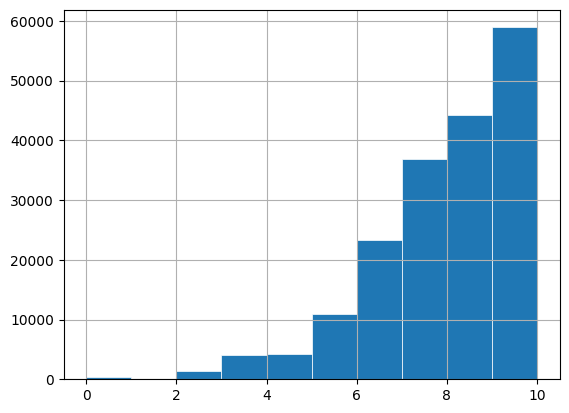

In [24]:
# Visualización de la distribución de las notas finales
# Este histograma muestra la frecuencia de las diferentes notas finales en el conjunto de datos.
df['nota_final_materia'].hist(edgecolor='white', linewidth=0.5)
plt.title('Distribución de Notas Finales')
plt.xlabel('Nota Final')
plt.ylabel('Frecuencia')
plt.show()

La mayor parte de los estudiantes obtuvieron notas entre 6 y 10. Hay una menor frecuencia de notas bajas. 
La mayor frecuencia de notas se encuentra en el rango de 8 a 10, lo que sugiere que la mayoría de los estudiantes alcanzaron un buen rendimiento académico.
La frecuencia de notas inferiores a 4 es muy baja, indicando que un porcentaje mínimo de estudiantes obtuvo calificaciones por debajo de este umbral.

Como conclusión podria decir que el rendimiento académico general es bueno: La mayoría de los estudiantes demostraron un buen dominio de los contenidos evaluados.

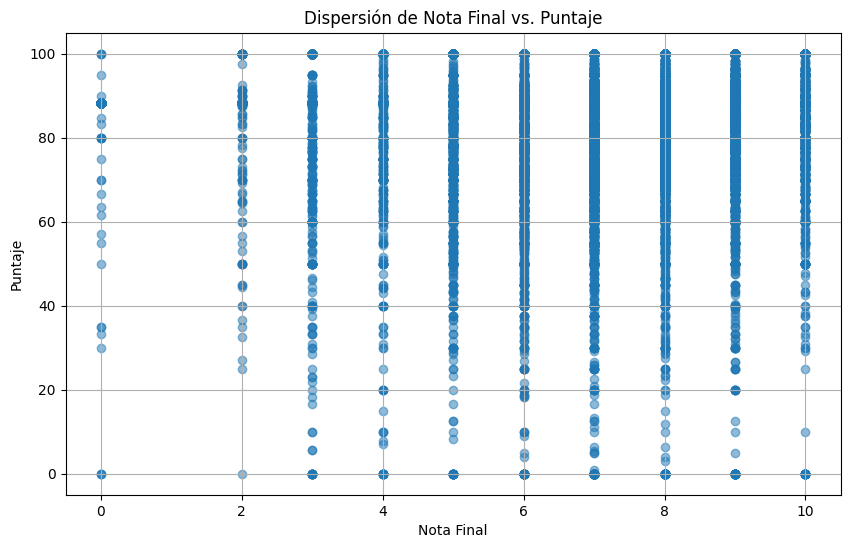

In [ ]:
# Este gráfico de dispersión muestra la relación entre las notas finales y los puntajes obtenidos.

plt.figure(figsize=(10, 6))
plt.scatter(df['nota_final_materia'], df['score'], alpha=0.5)
plt.title('Dispersión de Nota Final vs. Puntaje')
plt.xlabel('Nota Final')
plt.ylabel('Puntaje')
plt.grid(True)
plt.show()

El puntaje parece ser una función directa de la nota final. A medida que la nota final aumenta, también lo hacen los puntajes asociados. 
Si el puntaje se calcula a partir de la nota final, se esperaría una relación directa y estrecha.


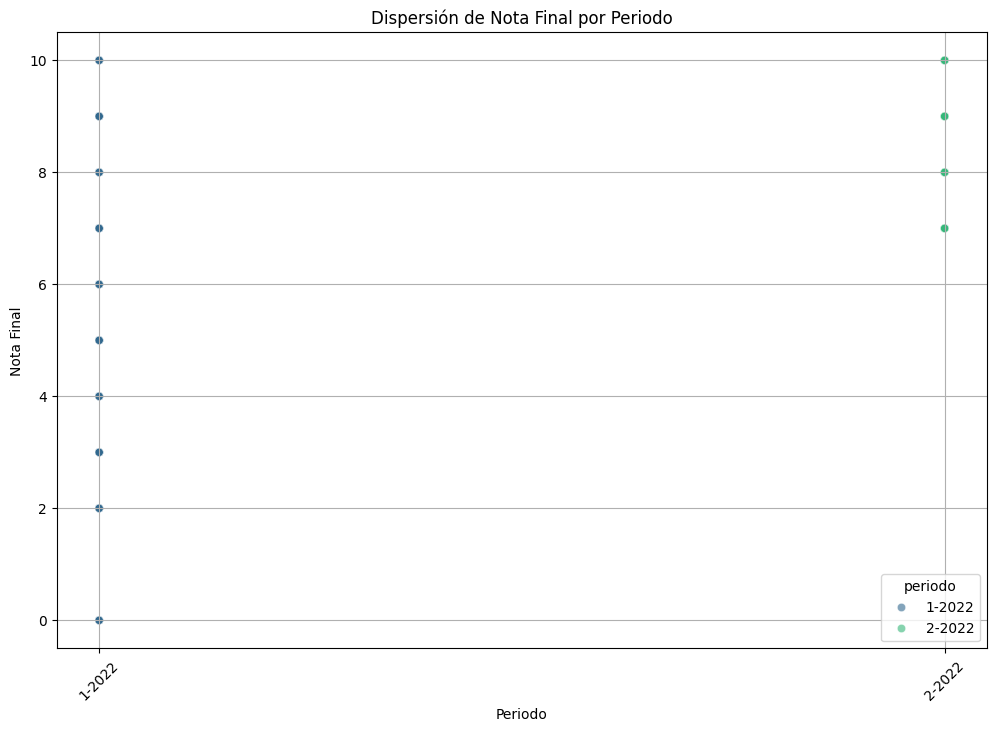

In [ ]:
# Este gráfico de dispersión muestra cómo se distribuyen las notas finales a lo largo de diferentes periodos.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='periodo', y='nota_final_materia', hue='periodo', palette='viridis', alpha=0.6)
plt.title('Dispersión de Nota Final por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Nota Final')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

No hay evidencia de cambios significativos en el rendimiento académico promedio entre los dos periodos evaluados.
La distribución de las notas finales es relativamente estable en ambos periodos.


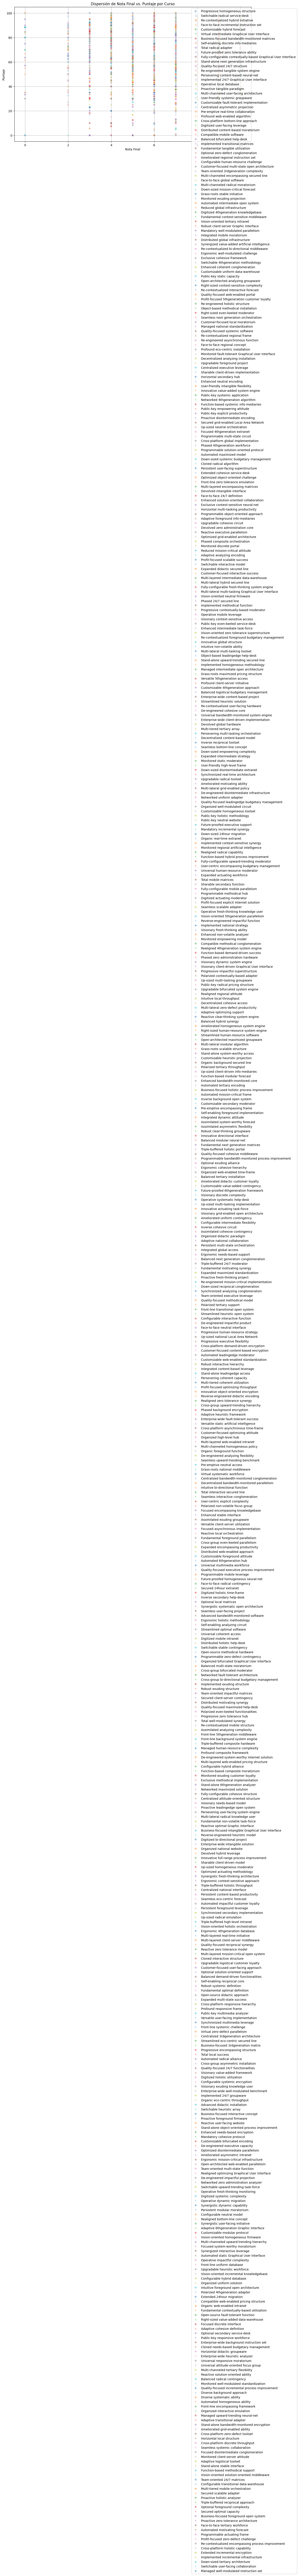

In [ ]:
# El siguiente gráfico de dispersión muestra la relación entre la Nota Final y el Puntaje, 
# categorizado por curso. Utiliza diferentes colores para distinguir los cursos y permite identificar 
# patrones o agrupaciones en los datos según el curso.
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='nota_final_materia', y='score', hue='course_name', palette='tab20', alpha=0.5)
plt.title('Dispersión de Nota Final vs. Puntaje por Curso')
plt.xlabel('Nota Final')
plt.ylabel('Puntaje')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

Conclusiones:
- Heterogeneidad entre Cursos: Los diferentes cursos presentan patrones de relación entre nota final y puntaje que varían considerablemente. Esto sugiere que la dificultad, la metodología de evaluación y posiblemente el contenido de cada curso influyen significativamente en los resultados de los estudiantes.

- No Correlación Lineal Perfecta: Si bien existe una tendencia general de que mayores puntajes se asocien con mayores notas finales, no se observa una correlación lineal perfecta en todos los cursos. Esto indica que otros factores, además del puntaje, influyen en la determinación de la nota final.

- Posibles Outliers: Algunos puntos se encuentran alejados de la tendencia general de sus respectivos cursos. Estos outliers podrían representar casos especiales, como estudiantes con dificultades particulares o excepcionales habilidades, o errores en la recopilación de datos.

- Agrupamientos: La formación de grupos distintos de puntos sugiere la existencia de diferentes perfiles de estudiantes o de cursos con características similares.


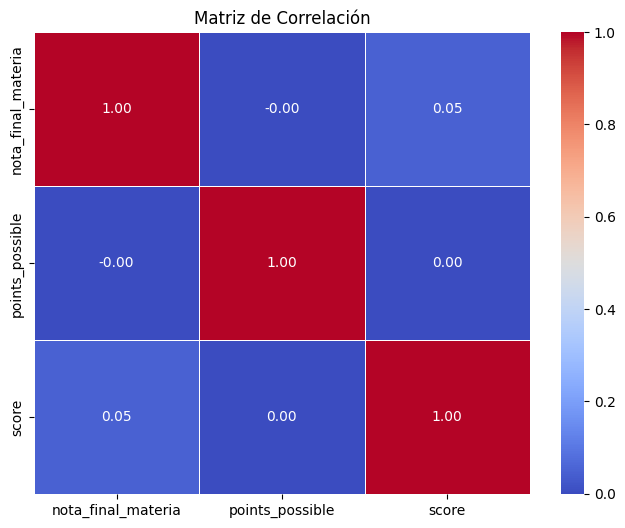

In [ ]:
# Evaluacion de la relación entre variables numéricas utilizando la matriz de correlación y un mapa de calor.
# Calculamos la matriz de correlación
correlation_matrix = df[['nota_final_materia', 'points_possible', 'score']].corr()

# Visualizamos la matriz de correlación usando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Los resultados obtenidos evidencian la necesidad de considerar múltiples factores al evaluar el rendimiento académico. Este análisis preliminar sienta las bases para desarrollar un modelo de evaluación más preciso y justo, capaz de identificar las verdaderas fortalezas y debilidades de cada estudiante

# Pruebas de Hipótesis
Realizo una prueba t para comparar las medias de las notas finales entre dos grupos de un curso específico. 

In [ ]:
from scipy import stats

# Filtramos datos para dos cursos específicos 
course1 = df[df['course_name'] == 'Intuitive non-volatile ability']['nota_final_materia']
course2 = df[df['course_name'] == 'Object-based leadingedge help-desk']['nota_final_materia']

# Realizamos una prueba t para dos muestras independientes
t_stat, p_value = stats.ttest_ind(course1, course2, equal_var=False)

print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Estadístico t: 29.79
Valor p: 0.0000


Existe una diferencia significativa en las notas finales entre los dos cursos comparados.

# Modelo de Regresión Preliminar

Utilizo la regresión lineal para entender cómo variables como el puntaje y los puntos posibles afectan las notas finales.

In [ ]:
import statsmodels.api as sm

# Prepar0 los datos para el modelo de regresión
X = df[['points_possible', 'score']]
y = df['nota_final_materia']

# Agrego una constante para el término de intersección
X = sm.add_constant(X)

# Creo el modelo de regresión
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     nota_final_materia   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     223.4
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           1.30e-97
Time:                        13:17:18   Log-Likelihood:            -3.6228e+05
No. Observations:              184156   AIC:                         7.246e+05
Df Residuals:                  184153   BIC:                         7.246e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.3829      0.182     

El modelo de regresión preliminar muestra que score es una variable significativa para predecir la nota_final_materia, pero la variable points_possible no muestra una influencia significativa. El bajo R-squared sugiere que el modelo no captura bien la variabilidad en las notas finales. Además, se deben considerar problemas potenciales de multicolinealidad y autocorrelación.

In [26]:
# Guardo el DataFrame consolidado y procesado en un archivo CSV llamado 'data_processed.csv' para su posterior análisis o compartición.
df.to_csv('data_processed.csv', index=False)